In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [3]:
path=pathy+'/data/tempsweep_no_diffpeak_2022-02-17-08-36-40'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_5/data2022-02-17-02-54-59.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_100/data2022-02-17-08-36-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_1/data2022-02-16-18-32-43.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_2/data2022-02-16-21-31-43.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_10/data2022-02-17-05-48-06.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_dif

In [4]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,2.957369,0.006462,2.607302,-0.006953,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_0.0,10.34
1,0.000000,1.034,2.944504,0.000026,2.607302,-0.006953,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_0.0,10.34
2,0.000000,2.068,2.945165,0.000026,2.607302,-0.006953,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_0.0,10.34
3,0.000000,3.102,2.946471,0.000026,2.607302,-0.006953,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_0.0,10.34
4,0.000000,4.136,2.946481,0.000026,2.607302,-0.006953,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,3.608913,0.000043,2.421355,1.409822,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_30.0,10.34
196,0.523599,202.664,3.611247,0.000043,2.421355,1.409822,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_30.0,10.34
197,0.523599,203.698,3.613584,0.000043,2.421355,1.409822,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_30.0,10.34
198,0.523599,204.732,3.615938,0.000043,2.421355,1.409822,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_30.0,10.34


[  5. 100.   1.   2.  10.   3.]


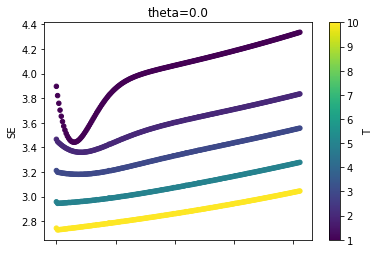

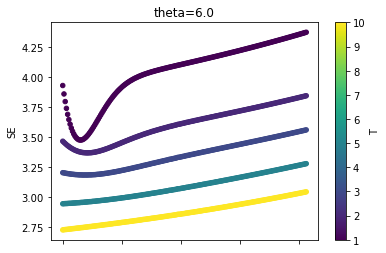

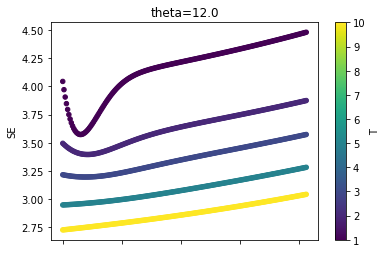

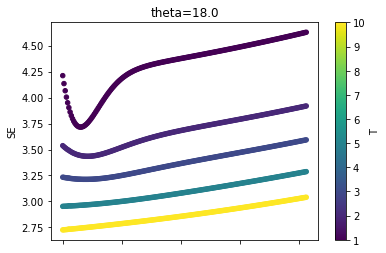

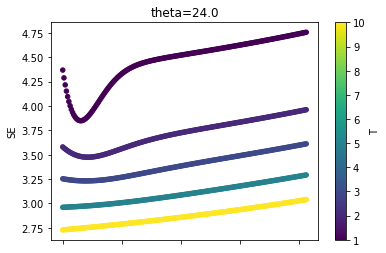

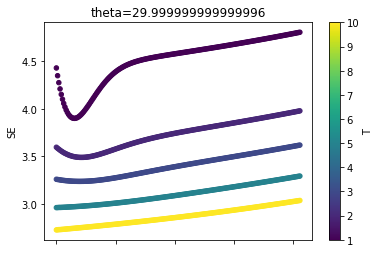

In [5]:
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    plt.title('theta='+str(th*180/np.pi))
    
print(tss)

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


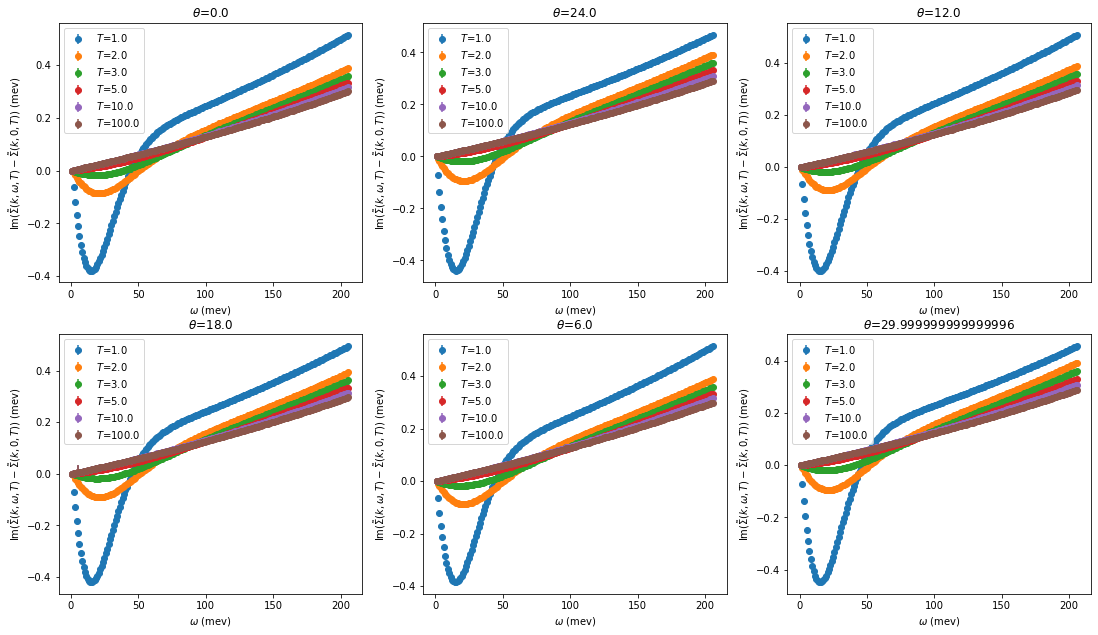

In [6]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0,100.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0


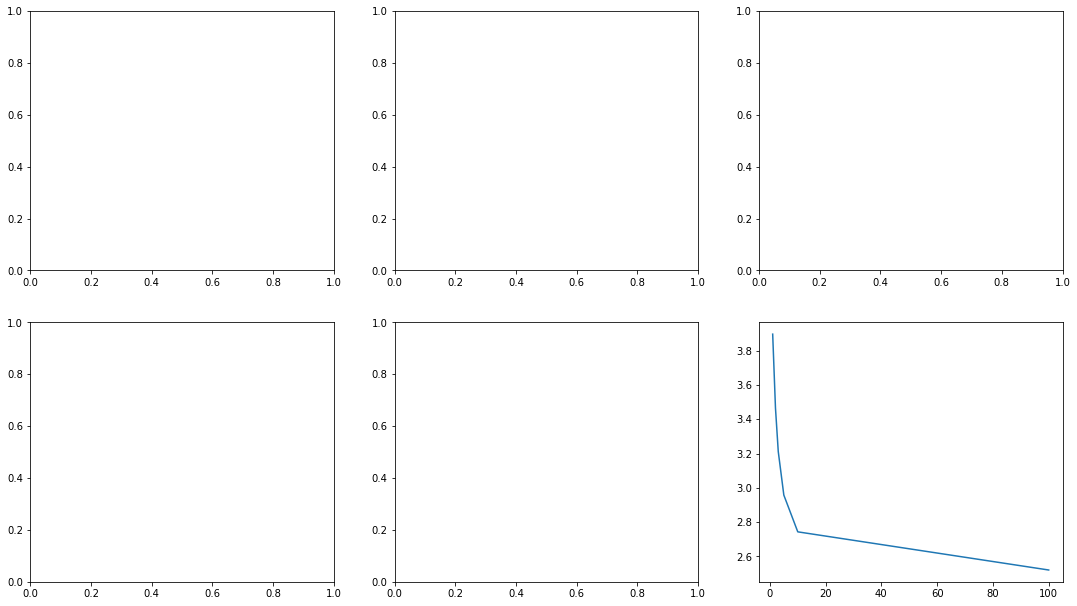

1 1 1


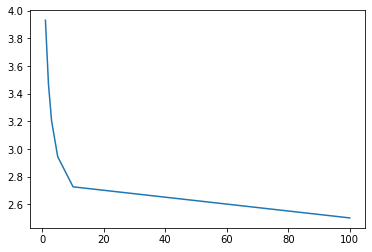

2 0 2


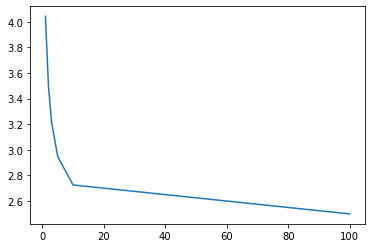

3 1 0


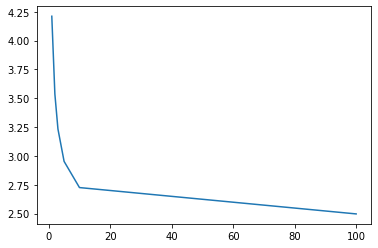

4 0 1


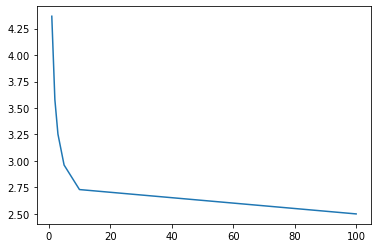

5 1 2


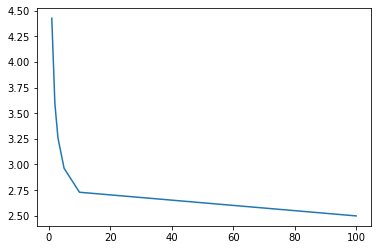

In [7]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0,100.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    plt.plot([1.0,2.0,3.0,5.0,10.0,100.0],a)
        
    # axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
    plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.41887902047863906]
0 0 0
4.28728628156091
3.568535348461114
3.250428028572101
2.9608646895816144
2.7295770140358697
2.4993255226025766


NameError: name 'integralsee' is not defined

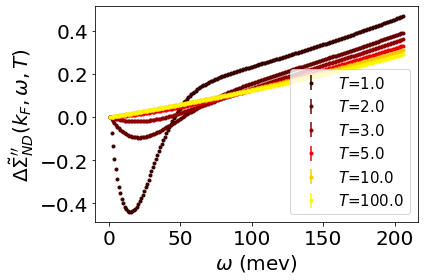

In [8]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0, 100.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        print(df3.iloc[1]['SE'])
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']

        
            
        err=df3['error']
        if T<50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        if T>50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(11/15))
        
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \tilde{\Sigma}_{ND}''(k_F,\omega, T)$", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=4)
    plt.tight_layout()
    
ww=np.linspace(0,205.76600000000002,np.size(integralsee[0]))
for i in integralsee:
    plt.plot(ww,i-i[0])
plt.savefig("imgs/pap_fig4a", dpi=700)

[0.41887902047863906]
0 0 0
4.28728628156091
3.568535348461114
3.250428028572101
2.9608646895816144
2.7295770140358697
2.4993255226025766


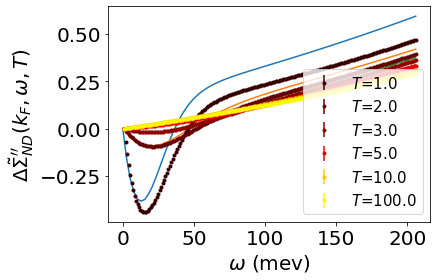

In [26]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0, 100.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        print(df3.iloc[1]['SE'])
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']

        
            
        err=df3['error']
        if T<50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        if T>50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(11/15))
        
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \tilde{\Sigma}_{ND}''(k_F,\omega, T)$", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=4)
    plt.tight_layout()
    
ww=np.linspace(0,205.76600000000002,np.size(integralsee[0]))
for i in integralsee:
    plt.plot(ww,i-i[0])
plt.savefig("imgs/pap_fig4a", dpi=700)

[0.41887902047863906]
0 0 0


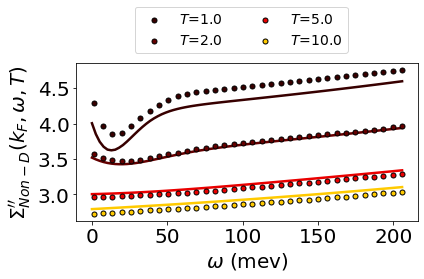

In [27]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
Tlist=[1.0,2.0,5.0,10.0]
# Tlist=[1.0,2.0,3.0,5.0,10.0,100.0]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in Tlist:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        err=df3['error']
        
        if T<50:
            axis.errorbar(x[1::6],(y[1::6]),yerr=err[1::6] , fmt='-', color=cm.hot(T/15), ls='None')
            axis.scatter(x[1::6],(y[1::6]) , edgecolor='k',  s=25,   label=r'$T$='+str(T),  color=cm.hot(T/15))
        if T>50:
            axis.errorbar(x[1::6],(y[1::6]),yerr=err[1::6] , fmt='-', color=cm.hot(11/15), ls='None')
            axis.scatter(x[1::6],(y[1::6]) , edgecolor='k', s=25,   label=r'$T$='+str(T),  color=cm.hot(11/15))
            
        
        
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$ \Sigma_{Non-D}''(k_F,\omega, T)$", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(bbox_to_anchor=(0.15,1.02,1,0.1), prop={'size': 14}, ncol=2)
    plt.tight_layout()
    
ww=np.linspace(0,205.76600000000002,np.size(integralsee[0]))
Tlist=[1.0,2.0,3.0,5.0,10.0,100.0]
index=[0,1,3,4]
for i in index:
    T=Tlist[i]
    if T<50:
        plt.plot(ww,integralsee[i], color=cm.hot(T/15), lw=2.5,zorder=0)
    if T>50:
        plt.plot(ww,integralsee[i], color=cm.hot(11/15), lw=2.5, zorder=0)
plt.savefig("imgs/pap_fig1f.png", dpi=400)

In [10]:
from tarfile import TarInfo
import numpy as np
import Lattice
import StructureFactor
import Dispersion
import matplotlib.pyplot as plt
import time
import sys
from scipy import integrate
import concurrent.futures
import functools
from traceback import print_exc
import os
from datetime import datetime
import gc
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot
from scipy.optimize import curve_fit
from scipy import special

Machine arg is, CH1
reading lattice from... ./Lattices/sqKgridX100.npy
reading lattice from... ./Lattices/sqKgridY100.npy
Machine arg is, CH1
starting sampling in reciprocal space....
 finished sampling in reciprocal space.... 0.06716632843017578
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97569514142434 45.58575006211245
sum of the hist, normed? 42.97569514142434
finished calculating filling for chemical potential
Filling: 0.49327262470675515 .... chemical potential: 24.009903210793027
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
1176 1257
227.9605415860735 -267.41895551257255

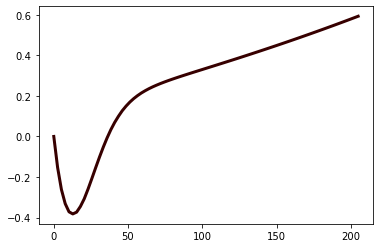

the effective diffusion constant is ... 0.7062228176824271 the scale C is ....  1.9022079031865045
the optimal paramss are [0.31448958 2.13319897]
4.741633327131133 4.76544236848358 1.0050212742550577 -0.6632076537343137
4.993745966767984 5.017312756833098 1.0047192608959175 -0.6254896829058216
5.245119057649909 5.267923943704768 1.004347830011904 -0.5877717120773296
5.494492876335665 5.5160385173166295 1.0039213156638642 -0.5500537412488384
5.740621676615569 5.7604619427219825 1.0034561180346082 -0.5123357704203464
5.982293060973259 6.000062278433373 1.0029703020696255 -0.47461779959185435
6.218346538540958 6.233787921426339 1.0024831975493287 -0.4368998287633632
6.448394653108734 6.460682874034486 1.001905624823975 -0.4054681864062868
6.6708996220777745 6.67989914239162 1.0013490714631743 -0.3740365440492104
6.88500276168799 6.89070600628433 1.0008283576337944 -0.342604901692134
7.090729549552683 7.092496036485017 1.0002491262598565 -0.3174595878064723
7.286001876164461 7.28478786980

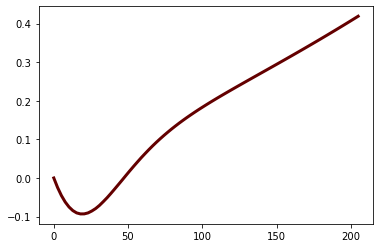

the effective diffusion constant is ... 0.7008405725264625 the scale C is ....  2.338398020192099
the optimal paramss are [0.32682634 2.00540276]
4.390400808748566 4.395016294727678 1.0010512675676249 -0.4683314711204396
4.558530990136552 4.56320427977168 1.0010251744795067 -0.4494724857061936
4.726268813251299 4.73093000543127 1.0009862308650117 -0.43061350029194756
4.893157838804073 4.897735868600296 1.0009355982265518 -0.41175451487770154
5.058748466208824 5.063173487089233 1.0008747264091042 -0.3928955294634555
5.22260212190934 5.226808083846795 1.000805338380998 -0.3740365440492104
5.384295231745396 5.388222607590155 1.0007294131684317 -0.35517755863496436
5.543568984136783 5.5470215147588515 1.0006227992529628 -0.342604901692134
5.699783554956953 5.702834147935341 1.0005352120741031 -0.32374591627788796
5.852697727453124 5.8553176578019315 1.0004476449102297 -0.30488693086364194
6.00216874512957 6.004159428833453 1.0003316607360462 -0.29231427392081155
6.147574230170682 6.1490789

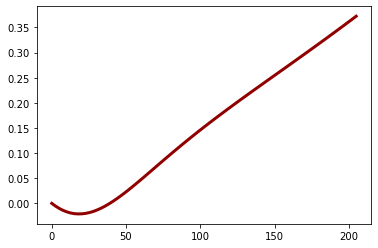

the effective diffusion constant is ... 0.73310610013193 the scale C is ....  2.8352829583717805
the optimal paramss are [0.32700734 1.84687389]
4.0469367397042335 4.046471130493952 0.9998849477419023 -0.2986006023922263
4.14431732037102 4.143846603792371 0.9998864187893297 -0.29231427392081155
4.24159249704331 4.241112353037599 0.9998868010055078 -0.2797416169779803
4.338658225283382 4.338159129469548 0.999884965399919 -0.27345528850656553
4.435400275485652 4.434878630712324 0.9998823905981584 -0.2671689600351499
4.531711885801451 4.531163963522003 0.9998790915456993 -0.26088263156373515
4.6274881399244885 4.62691009417181 0.9998750843362102 -0.2545963030923195
4.722626397657326 4.722014282633717 0.9998703867356705 -0.24830997462090387
4.8170267050593045 4.8163764969479175 0.999865018786235 -0.24202364614948912
4.910577584360506 4.90989980445252 0.999861975521954 -0.22945098920665785
5.003219241865423 5.002490736870185 0.9998543927499435 -0.2231646607352431
5.0948422877620105 5.094059

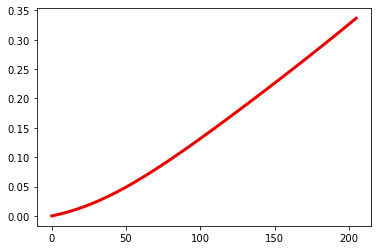

the effective diffusion constant is ... 0.794825521917035 the scale C is ....  3.3440184317783213
the optimal paramss are [0.31853208 1.69416104]
3.762108482521319 3.7606960657760804 0.9996245677784676 -0.15401504754967466
3.808362936183698 3.8069330183370718 0.9996245321492234 -0.15401504754967466
3.854599097203202 3.8531560996069 0.9996256426258832 -0.15401504754967466
3.9008096863391546 3.8993514547501085 0.999626172075466 -0.14772871907825902
3.9469825653675894 3.945505261801758 0.9996257131767458 -0.14772871907825902
3.993095590576176 3.9916037480003452 0.9996263944746648 -0.14772871907825902
4.039137281973051 4.037633205998498 0.9996276244481053 -0.14144239060684427
4.0851048353649295 4.083580009911441 0.9996267352944561 -0.14144239060684427
4.130971584948466 4.129430631163999 0.9996269754577637 -0.14144239060684427
4.176723987927146 4.175171654097611 0.9996283369851534 -0.14144239060684427
4.222362093849369 4.220789791300109 0.9996276248899757 -0.13515606213542863
4.267862071955

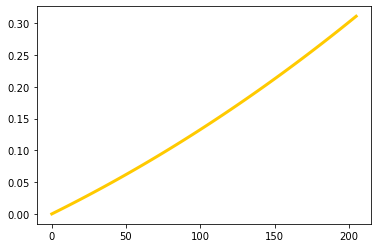

the effective diffusion constant is ... 0.8773896179252842 the scale C is ....  3.951027706470582
the optimal paramss are [0.30700929 1.53363113]
3.469006170571281 3.4672760738252215 0.9995012702021875 -0.015715821178538647
3.473304165936798 3.471571915899919 0.999501267394354 -0.015715821178538647
3.4776021477034034 3.4758677447871236 0.9995012647098159 -0.015715821178538647
3.4819001026755685 3.480163547299501 0.99950126214858 -0.015715821178538647
3.486198017658099 3.4844593102500427 0.9995012597106506 -0.015715821178538647
3.4904958794562884 3.488755020452227 0.9995012573960315 -0.015715821178538647
3.494793674876082 3.4930506647201773 0.9995012552047249 -0.015715821178538647
3.4990913907242462 3.4973462298688305 0.9995012531367309 -0.015715821178538647
3.5033890138085186 3.5016417027140916 0.9995012511920486 -0.015715821178538647
3.5076865309377756 3.505937070072997 0.9995012493706754 -0.015715821178538647
3.5119839289222 3.5102323187638813 0.9995012476726065 -0.015715821178538647

In [11]:
Machine='CH1'
##########################
##########################
# parameters
##########################
##########################
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5

#rotated FS parameters
# J=2*5.17 #in mev
# tp1=568/J #in units of Js\
# tp2=tp1*0.258 #/tpp1
# ##coupling 
# U=4000/J
# g=100/J
# Kcou=g*g/U
# # fill=0.67 #van hove
# fill=0.35
##params quasicircular and circular FS
# J=2*5.17 #in mev
# tp1=568/J #in units of Js
# tp2=0.065*tp1
# ##coupling 
# U=4000/J
# g=100/J
# Kcou=g*g/U
# fill=0.1
##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=100,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save, Machine)
[KX,KY]=l.read_lattice(sq=1)
# [KX,KY]=l.Generate_lattice_SQ()
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, Machine)
[KX2,KY2]=l2.Generate_lattice()
Vol_rec2=l2.Vol_BZ()

Npoints_int=np.size(KX)
ds=Vol_rec/Npoints_int



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill)
plt.plot(ed.earr,ed.Dos)
plt.axvline(ed.mu, c='b', lw=1)
plt.axvline(ed.mu+20, c='r', lw=1)



indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+20))**2)
print(indmin, indmax)
# freqrange=ed.earr[indmin:indmax]
plt.plot(ed.earr[indmin:indmax],ed.Dos[indmin:indmax])
# plt.axvline(ed.mu-1, c='r', lw=1)
plt.savefig("Dos.png")
plt.close()


print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]
vals=6
# Tvals=np.linspace(1,10,vals)
# Tvals=np.arange(1,10,1)
Tvals=[1,2,3,5,10,100]
# Tvals=np.linspace(1,100,vals)

def ff3(ome,gam,c):
    return c*np.exp(-gam*(ome**2)/2)

def fexp(ome,b,e, gam):
    return -gam*(ome**2)/2-np.log(np.exp(b*(ome-e))+1)

def fppexp(ome, b , e, gam):
    sech=1/np.cosh(b*(ome-e)/2)
    return -gam-(b*sech/2)**2

def saddle(ome,b , e, gam, maxom):
    return np.exp(fexp(ome,b,e, gam))*2*maxom
    
def saddle_2(ome, b , e, gam, maxom):
    sqff2=np.sqrt(np.abs(fppexp(ome, b , e, gam)))
    erfpart=2#special.erf(sqff2*(ome+maxom)/np.sqrt(2))-special.erf(sqff2*(ome-maxom)/np.sqrt(2))
    flucpart=np.sqrt(np.pi/2)*erfpart/sqff2
    return np.exp(fexp(ome,b,e, gam))*flucpart

zerps=np.zeros(vals)
ints=np.zeros(vals)
Jcut=3
integralsee=[]
for i,T in enumerate(Tvals):
    SS=StructureFactor.StructureFac_fit_no_diff_peak(T)
    S=[]
    for omega in ome:
        Siav=np.sum(SS.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
        S.append(Siav)
    popt, pcov = curve_fit(ff3, ome, S)
    print('the optimal paramss are',popt)
    integ=[]
    for e in nu:
        inti_pre=np.trapz(ff3(ome,popt[0],popt[1])/(np.exp((ome-e)/T)+1))*dome
        # integ.append(inti)
        gam=popt[0]
        eta=popt[1]
        omestar=ome[np.argmax(fexp(ome,1/T, e, gam))]
        maxom=np.max(ome)
        inti=eta*saddle_2(omestar, 1/T , e, gam, maxom)
        print(inti, inti_pre, inti_pre/inti, omestar)
        integ.append(inti)
    intres=np.array(integ)
    expart=np.exp(-nu/T)+1
    tauinv= (2*np.pi)*(J)*Kcou*Kcou*rhonu*intres*expart
    zerps[i]=tauinv[0]
    integralsee.append(tauinv)
    tauinv=tauinv-tauinv[0]
    if T<50:
        plt.plot(nu*J,tauinv , color=cm.hot(T/15), label='T='+str(T), lw=3)
    if T>50:
        plt.plot(nu*J,tauinv , color=cm.hot(11/15), label='T='+str(T), lw=3)
    
plt.ylabel(r"$\Delta \tilde{\Sigma}_{ND}''(k_F,\omega, T)$", size=20)
plt.xlabel(r"$\omega$ (mev)", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
pyplot.locator_params(axis='y', nbins=5)
pyplot.locator_params(axis='x', nbins=7)
plt.legend(prop={'size': 15}, loc=4)
plt.tight_layout()
plt.savefig("local_ap_gauss_sad2.png")

zervals2=[4.28728628156091,3.568535348461114,3.250428028572101,2.9608646895816144,2.7295770140358697,2.4993255226025766]
print(np.shape(zerps))
plt.close()
plt.errorbar(Tvals,zerps,yerr=0, fmt='o-',label="analytical", lw=3)
plt.errorbar([1,2,3,5,10,100],zervals2,yerr=0, fmt='o-', label='numerical SF', lw=3)
plt.ylabel(r"$\tilde{\Sigma}_{ND}''(k_F,0, T)$", size=20)
plt.xlabel(r"$T/J$", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
pyplot.locator_params(axis='y', nbins=5)
pyplot.locator_params(axis='x', nbins=7)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig("zeroval_gauss_sad2.png")
plt.close()
  